<a href="https://colab.research.google.com/github/howard-haowen/NLP-demos/blob/main/nlp_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLTK Corpus

In [1]:
import nltk

## Types of corpus structures
- isolated: `gutenberg`
- categorized: `brown`
- overlapping: `reuters`
- temporal: `inaugural`

## Brown

In [2]:
nltk.corpus.brown

<CategorizedTaggedCorpusReader in '.../corpora/brown' (not loaded yet)>

In [3]:
nltk.download('brown')
from nltk.corpus import brown

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


In [4]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [5]:
tagged_sents = brown.tagged_sents(categories='humor')
len(tagged_sents)

1053

In [6]:
for sent in tagged_sents[:3]:
    print(sent)

[('It', 'PPS'), ('was', 'BEDZ'), ('among', 'IN'), ('these', 'DTS'), ('that', 'CS'), ('Hinkle', 'NP'), ('identified', 'VBD'), ('a', 'AT'), ('photograph', 'NN'), ('of', 'IN'), ('Barco', 'NP'), ('!', '.'), ('!', '.')]
[('For', 'CS'), ('it', 'PPS'), ('seems', 'VBZ'), ('that', 'CS'), ('Barco', 'NP'), (',', ','), ('fancying', 'VBG'), ('himself', 'PPL'), ('a', 'AT'), ("ladies'", 'NNS$'), ('man', 'NN'), ('(', '('), ('and', 'CC'), ('why', 'WRB'), ('not', '*'), (',', ','), ('after', 'IN'), ('seven', 'CD'), ('marriages', 'NNS'), ('?', '.'), ('?', '.')]
[(')', ')'), (',', ','), ('had', 'HVD'), ('listed', 'VBN'), ('himself', 'PPL'), ('for', 'IN'), ('Mormon', 'NP-TL'), ('Beard', 'NN-TL'), ('roles', 'NNS'), ('at', 'IN'), ('the', 'AT'), ('instigation', 'NN'), ('of', 'IN'), ('his', 'PP$'), ('fourth', 'OD'), ('murder', 'NN'), ('victim', 'NN'), ('who', 'WPS'), ('had', 'HVD'), ('said', 'VBN'), (':', ':'), ('``', '``'), ('With', 'IN'), ('your', 'PP$'), ('beard', 'NN'), (',', ','), ('dear', 'JJ'), (',', ','

## Inaugural speeches

In [7]:
nltk.corpus.inaugural

<PlaintextCorpusReader in '.../corpora/inaugural' (not loaded yet)>

In [8]:
nltk.download('inaugural')
from nltk.corpus import inaugural

[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.


In [26]:
file_ids = inaugural.fileids()
file_ids

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [27]:
inaugural.raw(file_ids[-1])

'Chief Justice Roberts, Vice President Harris, Speaker Pelosi, Leader Schumer, Leader McConnell, Vice President Pence, and my distinguished guests, and my fellow Americans: This is America\'s day. This is democracy\'s day, a day of history and hope, of renewal and resolve. Through a crucible for the ages America has been tested anew, and America has risen to the challenge.\n\nToday we celebrate the triumph not of a candidate, but of a cause, the cause of democracy. The peopleâ\x80\x94the will of the people has been heard, and the will of the people has been heeded. We\'ve learned again that democracy is precious, democracy is fragile. And at this hour, my friends, democracy has prevailed.\n\nSo now, on this hallowed ground where just a few days ago violence sought to shake the Capitol\'s very foundation, we come together as one Nation under God, indivisible, to carry out the peaceful transfer of power as we have for more than two centuries. As we look ahead in our uniquely American way

In [35]:
import pandas as pd

def inaugura2df(file_ids):
    years = [id[:4] for id in file_ids]
    presidents = [id[5:].replace(".txt", "") for id in file_ids]
    texts = [inaugural.raw(id) for id in file_ids]
    tokens = [inaugural.words(id) for id in file_ids]
    df = pd.DataFrame(
        {
            "year": years,
            "president": presidents,
            "text": texts,
            "tokens": tokens,
        }
    )
    df.set_index("year", inplace=True)
    df.index = df.index.astype(int)
    return df

In [36]:
speeches = inaugura2df(file_ids)
speeches

,president,text,tokens
year,,,
1789,Washington,Fellow-Citizens of the Senate and of the House...,"(Fellow, -, Citizens, of, the, Senate, and, of..."
1793,Washington,"Fellow citizens, I am again called upon by the...","(Fellow, citizens, ,, I, am, again, called, up..."
1797,Adams,"When it was first perceived, in early times, t...","(When, it, was, first, perceived, ,, in, early..."
1801,Jefferson,Friends and Fellow Citizens:\n\nCalled upon to...,"(Friends, and, Fellow, Citizens, :, Called, up..."
1805,Jefferson,"Proceeding, fellow citizens, to that qualifica...","(Proceeding, ,, fellow, citizens, ,, to, that,..."
1809,Madison,Unwilling to depart from examples of the most ...,"(Unwilling, to, depart, from, examples, of, th..."
1813,Madison,About to add the solemnity of an oath to the o...,"(About, to, add, the, solemnity, of, an, oath,..."
1817,Monroe,I should be destitute of feeling if I was not ...,"(I, should, be, destitute, of, feeling, if, I,..."
1821,Monroe,"Fellow citizens, I shall not attempt to descri...","(Fellow, citizens, ,, I, shall, not, attempt, ..."


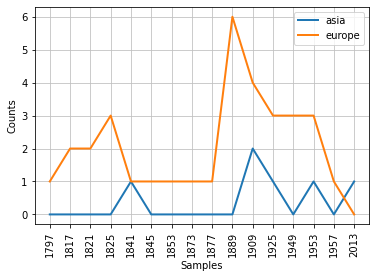

In [10]:
cfd = nltk.ConditionalFreqDist(
                (target, fileid[:4])
                for fileid in inaugural.fileids()
                for w in inaugural.words(fileid)
                for target in ['asia', 'europe']
                if w.lower().startswith(target))
cfd.plot()

## Movie reviews

In [29]:
nltk.corpus.movie_reviews

<CategorizedPlaintextCorpusReader in '.../corpora/movie_reviews' (not loaded yet)>

In [30]:
nltk.download('movie_reviews')
from nltk.corpus import movie_reviews

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


In [40]:
file_ids = movie_reviews.fileids()
file_ids

['neg/cv000_29416.txt',
 'neg/cv001_19502.txt',
 'neg/cv002_17424.txt',
 'neg/cv003_12683.txt',
 'neg/cv004_12641.txt',
 'neg/cv005_29357.txt',
 'neg/cv006_17022.txt',
 'neg/cv007_4992.txt',
 'neg/cv008_29326.txt',
 'neg/cv009_29417.txt',
 'neg/cv010_29063.txt',
 'neg/cv011_13044.txt',
 'neg/cv012_29411.txt',
 'neg/cv013_10494.txt',
 'neg/cv014_15600.txt',
 'neg/cv015_29356.txt',
 'neg/cv016_4348.txt',
 'neg/cv017_23487.txt',
 'neg/cv018_21672.txt',
 'neg/cv019_16117.txt',
 'neg/cv020_9234.txt',
 'neg/cv021_17313.txt',
 'neg/cv022_14227.txt',
 'neg/cv023_13847.txt',
 'neg/cv024_7033.txt',
 'neg/cv025_29825.txt',
 'neg/cv026_29229.txt',
 'neg/cv027_26270.txt',
 'neg/cv028_26964.txt',
 'neg/cv029_19943.txt',
 'neg/cv030_22893.txt',
 'neg/cv031_19540.txt',
 'neg/cv032_23718.txt',
 'neg/cv033_25680.txt',
 'neg/cv034_29446.txt',
 'neg/cv035_3343.txt',
 'neg/cv036_18385.txt',
 'neg/cv037_19798.txt',
 'neg/cv038_9781.txt',
 'neg/cv039_5963.txt',
 'neg/cv040_8829.txt',
 'neg/cv041_22364.txt',


In [41]:
len(file_ids)

2000

In [42]:
neg_ids = [id for id in file_ids if id[:3] == 'neg']
pos_ids = [id for id in file_ids if id[:3] == 'pos']
print(len(neg_ids), len(pos_ids))

1000 1000


In [43]:
movie_reviews.raw(file_ids[0])

'plot : two teen couples go to a church party , drink and then drive . \nthey get into an accident . \none of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . \nwhat\'s the deal ? \nwatch the movie and " sorta " find out . . . \ncritique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . \nwhich is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn\'t snag this one correctly . \nthey seem to have taken this pretty neat concept , but executed it terribly . \nso what are the problems with the movie ? \nwell , its main problem is that it\'s simply too jumbled . \nit starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience membe

In [44]:
def moviews2df(file_ids):
    sentiments = [1 if id[:3] == 'pos' else 0 for id in file_ids]
    texts = [movie_reviews.raw(id) for id in file_ids]
    tokens = [movie_reviews.words(id) for id in file_ids]
    df = pd.DataFrame(
        {
            "sentiment": sentiments,
            "text": texts,
            "tokens": tokens,
        }
    )
    return df

In [45]:
movies = moviews2df(file_ids)
movies

,sentiment,text,tokens
0,0,"plot : two teen couples go to a church party ,...","(plot, :, two, teen, couples, go, to, a, churc..."
1,0,the happy bastard's quick movie review \ndamn ...,"(the, happy, bastard, ', s, quick, movie, revi..."
2,0,it is movies like these that make a jaded movi...,"(it, is, movies, like, these, that, make, a, j..."
3,0,""" quest for camelot "" is warner bros . ' firs...","("", quest, for, camelot, "", is, warner, bros, ..."
4,0,synopsis : a mentally unstable man undergoing ...,"(synopsis, :, a, mentally, unstable, man, unde..."
...,...,...,...
1995,1,wow ! what a movie . \nit's everything a movie...,"(wow, !, what, a, movie, ., it, ', s, everythi..."
1996,1,"richard gere can be a commanding actor , but h...","(richard, gere, can, be, a, commanding, actor,..."
1997,1,"glory--starring matthew broderick , denzel was...","(glory, --, starring, matthew, broderick, ,, d..."
1998,1,steven spielberg's second epic film on world w...,"(steven, spielberg, ', s, second, epic, film, ..."


# Hugging Face Datasets

In [14]:
!pip install datasets

     |████████████████████████████████| 325 kB 5.3 MB/s 
     |████████████████████████████████| 212 kB 51.0 MB/s 
     |████████████████████████████████| 1.1 MB 44.7 MB/s 
     |████████████████████████████████| 136 kB 49.1 MB/s 
     |████████████████████████████████| 77 kB 4.8 MB/s 
     |████████████████████████████████| 127 kB 52.9 MB/s 
     |████████████████████████████████| 94 kB 3.1 MB/s 
     |████████████████████████████████| 271 kB 56.9 MB/s 
     |████████████████████████████████| 144 kB 64.3 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [15]:
from datasets import list_datasets

In [16]:
hf_datasets = list_datasets()
print("Number of datasets in the Datasets library: ", len(hf_datasets), "\n\n")

Number of datasets in the Datasets library:  4307 




In [23]:
hf_datasets

['assin',
 'ar_res_reviews',
 'ambig_qa',
 'bianet',
 'ag_news',
 'ajgt_twitter_ar',
 'aeslc',
 'bc2gm_corpus',
 'air_dialogue',
 'acronym_identification',
 'afrikaans_ner_corpus',
 'allegro_reviews',
 'ade_corpus_v2',
 'adversarial_qa',
 'alt',
 'billsum',
 'amazon_polarity',
 'amttl',
 'ascent_kb',
 'big_patent',
 'bn_hate_speech',
 'bswac',
 'capes',
 'arsentd_lev',
 'bible_para',
 'amazon_reviews_multi',
 'ai2_arc',
 'beans',
 'anli',
 'arabic_pos_dialect',
 'best2009',
 'boolq',
 'ar_sarcasm',
 'asnq',
 'bnl_newspapers',
 'amazon_us_reviews',
 'arxiv_dataset',
 'banking77',
 'bookcorpus',
 'bprec',
 'c3',
 'allocine',
 'aslg_pc12',
 'biosses',
 'bbc_hindi_nli',
 'americas_nli',
 'biomrc',
 'blimp',
 'aqua_rat',
 'aquamuse',
 'ar_cov19',
 'arabic_speech_corpus',
 'arcd',
 'blended_skill_talk',
 'cail2018',
 'blbooksgenre',
 'bookcorpusopen',
 'bsd_ja_en',
 'atomic',
 'autshumato',
 'blog_authorship_corpus',
 'caner',
 'app_reviews',
 'arabic_billion_words',
 'art',
 'asset',
 'blbo

In [17]:
from datasets import load_dataset

In [18]:
# The second argument indicates languages, and the options include:
# "all_languages", "de", "en", "es", "fr", "ja", "zh"
dataset = load_dataset("amazon_reviews_multi", "en")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/200000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5000 [00:00<?, ? examples/s]

Dataset amazon_reviews_multi downloaded and prepared to /root/.cache/huggingface/datasets/amazon_reviews_multi/en/1.0.0/724e94f4b0c6c405ce7e476a6c5ef4f87db30799ad49f765094cf9770e0f7609. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

## DatasetDict

In [19]:
dataset

DatasetDict({
    train: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 200000
    })
    validation: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 5000
    })
    test: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 5000
    })
})

In [20]:
def show_samples(dataset, num_samples=3, seed=42):
    sample = dataset["train"].shuffle(seed=seed).select(range(num_samples))
    for example in sample:
        print(f"\n'>> Title: {example['review_title']}'")
        print(f"'>> Review: {example['review_body']}'")
        print(f"'>> Product Category: {example['product_category']}'")
        print(f"'>> Review stars: {example['stars']}'")

In [21]:
show_samples(dataset)


'>> Title: Worked in front position, not rear'
'>> Review: 3 stars because these are not rear brakes as stated in the item description. At least the mount adapter only worked on the front fork of the bike that I got it for.'
'>> Product Category: other'
'>> Review stars: 3'

'>> Title: meh'
'>> Review: Does it’s job and it’s gorgeous but mine is falling apart, I had to basically put it together again with hot glue'
'>> Product Category: beauty'
'>> Review stars: 2'

'>> Title: Can't beat these for the money'
'>> Review: Bought this for handling miscellaneous aircraft parts and hanger "stuff" that I needed to organize; it really fit the bill. The unit arrived quickly, was well packaged and arrived intact (always a good sign). There are five wall mounts-- three on the top and two on the bottom. I wanted to mount it on the wall, so all I had to do was to remove the top two layers of plastic drawers, as well as the bottom corner drawers, place it when I wanted and mark it; I then used som

## Pandas DataFrame

In [22]:
dataset.set_format("pandas")
df = dataset["test"][:]
df

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,en_0199937,product_en_0902516,reviewer_en_0097389,1,"These are AWFUL. They are see through, the fab...",Don’t waste your time!,en,apparel
1,en_0863335,product_en_0348072,reviewer_en_0601537,1,I bought 4 and NONE of them worked. Yes I used...,One Star,en,other
2,en_0565010,product_en_0356154,reviewer_en_0970351,1,On first use it didn't heat up and now it does...,Totally useless,en,other
3,en_0963290,product_en_0583322,reviewer_en_0216125,1,You want an HONEST answer? I just returned fro...,Gold filled earrings,en,jewelry
4,en_0238156,product_en_0487636,reviewer_en_0514203,1,The glue works fine but the container is impos...,Poor container,en,industrial_supplies
...,...,...,...,...,...,...,...,...
4995,en_0681530,product_en_0198517,reviewer_en_0539725,5,"It's still early, but so far the scales seems ...",Very sleek.,en,drugstore
4996,en_0157408,product_en_0206198,reviewer_en_0605408,5,I’ve used this face mask a few times now and i...,... face mask a few times now and it works gre...,en,beauty
4997,en_0542558,product_en_0525205,reviewer_en_0727937,5,Great price. Good quality.,Five Stars,en,home
4998,en_0754850,product_en_0613095,reviewer_en_0643466,5,Fits my 2016 F150 XLT great. Now I dont have t...,2016 F150 XLT,en,automotive
